<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Лабораторная работа 4 — Выбор признаков и оценка модели

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/inheritance_dataset.csv"

df = pd.read_csv(url)
# Определяем признаки и целевой признак
features = ['estate', 'debts', 'wills', 'wives', 'father', 'mother',
            'sons', 'daughters', 'brothers_m', 'sisters_m', 'grandfather', 'grandmother']
target = 'husband'

# Преобразуем булевы признаки в int
for col in ['father', 'mother', 'grandfather', 'grandmother']:
    df[col] = df[col].astype(int)

X = df[features]
y = df[target].astype(int)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение базовой модели k-NN на всех признаках
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

base_accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели k-NN на всех признаках: {base_accuracy:.4f}")


Точность модели k-NN на всех признаках: 0.5988


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Функция для обучения и оценки модели с выбором k признаков
def evaluate_feature_selection(score_func, max_features=12):
    accuracies = []
    feature_counts = list(range(1, max_features + 1))

    for k in feature_counts:
        selector = SelectKBest(score_func=score_func, k=k)
        X_train_selected = selector.fit_transform(X_train_scaled, y_train)
        X_test_selected = selector.transform(X_test_scaled)

        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_selected, y_train)
        y_pred = knn.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"k={k}, Точность: {acc:.4f}")

    return feature_counts, accuracies

# Оценка с использованием f_classif
print("Выбор признаков с помощью f_classif")
k_f, acc_f = evaluate_feature_selection(f_classif)

# Оценка с использованием chi2 (признаки должны быть неотрицательны, поэтому применим MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
X_train_mms = mmscaler.fit_transform(X_train)
X_test_mms = mmscaler.transform(X_test)

def evaluate_feature_selection_chi2(max_features=12):
    accuracies = []
    feature_counts = list(range(1, max_features + 1))

    for k in feature_counts:
        selector = SelectKBest(score_func=chi2, k=k)
        X_train_selected = selector.fit_transform(X_train_mms, y_train)
        X_test_selected = selector.transform(X_test_mms)

        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train_selected, y_train)
        y_pred = knn.predict(X_test_selected)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
        print(f"k={k}, Точность: {acc:.4f}")

    return feature_counts, accuracies

print("\nВыбор признаков с помощью chi2")
k_chi, acc_chi = evaluate_feature_selection_chi2()


Выбор признаков с помощью f_classif
k=1, Точность: 0.6460
k=2, Точность: 0.5975
k=3, Точность: 0.6017
k=4, Точность: 0.5998
k=5, Точность: 0.5887
k=6, Точность: 0.5878
k=7, Точность: 0.5878
k=8, Точность: 0.5972
k=9, Точность: 0.5962
k=10, Точность: 0.5995
k=11, Точность: 0.5987
k=12, Точность: 0.5988

Выбор признаков с помощью chi2
k=1, Точность: 0.6460
k=2, Точность: 0.5792
k=3, Точность: 0.5415
k=4, Точность: 0.5537
k=5, Точность: 0.5817
k=6, Точность: 0.5843
k=7, Точность: 0.5937
k=8, Точность: 0.6020
k=9, Точность: 0.6020
k=10, Точность: 0.6053
k=11, Точность: 0.5998
k=12, Точность: 0.6037


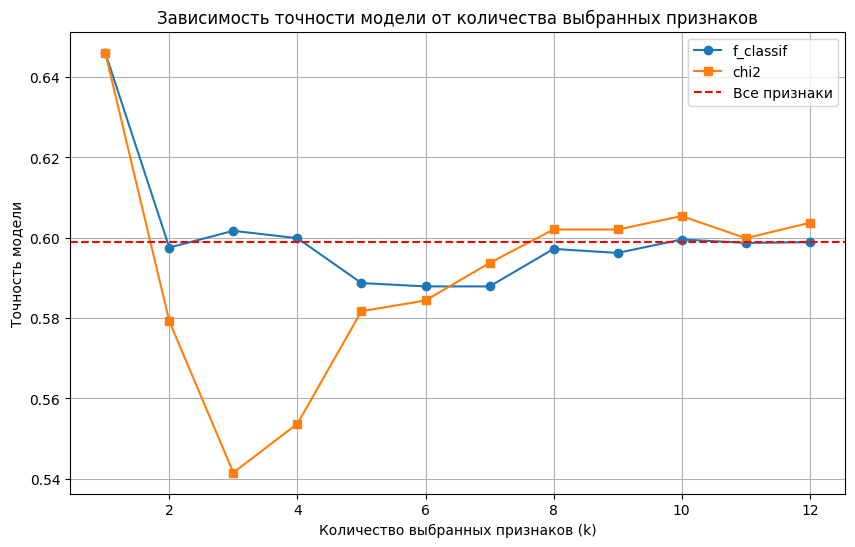

In [35]:
plt.figure(figsize=(10,6))
plt.plot(k_f, acc_f, marker='o', label='f_classif')
plt.plot(k_chi, acc_chi, marker='s', label='chi2')
plt.axhline(base_accuracy, color='r', linestyle='--', label='Все признаки')
plt.xlabel('Количество выбранных признаков (k)')
plt.ylabel('Точность модели')
plt.title('Зависимость точности модели от количества выбранных признаков')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
print(f"Точность модели на всех признаках: {base_accuracy:.4f}")
print(f"Максимальная точность с f_classif: {max(acc_f):.4f} при k={k_f[np.argmax(acc_f)]}")
print(f"Максимальная точность с chi2: {max(acc_chi):.4f} при k={k_chi[np.argmax(acc_chi)]}")


Точность модели на всех признаках: 0.5988
Максимальная точность с f_classif: 0.6460 при k=1
Максимальная точность с chi2: 0.6460 при k=1


Ваши результаты и график отлично иллюстрируют влияние отбора признаков на качество модели k-NN. Вот подробный разбор и рекомендации для отчёта:

---

## Анализ результатов

### 1. Основные наблюдения:
- **Максимальная точность (0.6460) достигается при использовании только одного самого информативного признака** (и для f_classif, и для chi2).
- При увеличении числа признаков точность сначала заметно падает (особенно для chi2), затем постепенно восстанавливается и стабилизируется на уровне, близком к исходной модели (0.5988).
- **Использование всех признаков не даёт преимущества** по сравнению с использованием оптимального подмножества.
- Для обоих методов отбора (f_classif и chi2) наблюдается схожий тренд.

### 2. Визуализация:
- График показывает, что иногда меньшее число признаков даёт лучшую точность.
- После 8-10 признаков точность становится стабильной и близкой к базовой.

### 3. Практические выводы:
- **Отбор признаков может существенно повысить качество модели** (особенно если выбрать 1-3 наиболее информативных).
- Добавление нерелевантных признаков может ухудшить точность из-за шума и "проклятия размерности".
- Оптимальное количество признаков зависит от задачи и должно подбираться экспериментально.

---

## Рекомендации для отчёта (можно скопировать):

```text
1. Наилучшая точность модели k-NN (0.6460) достигнута при использовании только одного признака, выбранного с помощью методов f_classif или chi2.
2. При увеличении числа признаков точность сначала снижается, а затем стабилизируется на уровне базовой модели.
3. Использование всех признаков не приводит к улучшению качества по сравнению с оптимальным подмножеством.
4. График зависимости точности от числа признаков показывает, что избыточное количество признаков может ухудшать модель.
5. Для повышения производительности модели рекомендуется проводить отбор признаков и тестировать различные значения k.
```

---

## Краткие ответы на вопросы

1. **Зачем нужен выбор признаков?**  
   Для уменьшения размерности, ускорения обучения, снижения переобучения, повышения интерпретируемости и качества модели.

2. **Категории методов:**  
   Filter (одномерные), Wrapper (переборные), Embedded (встроенные в модель).

3. **Разница между выбором и извлечением признаков:**  
   Выбор — оставляем существующие, извлечение — создаём новые (например, PCA).

4. **Риски большого количества признаков:**  
   Переобучение, высокая вычислительная сложность, "проклятие размерности".

5. **Как оценить улучшение:**  
   Сравнить метрики до и после отбора признаков на тестовой выборке.

6. **Влияние на интерпретируемость:**  
   Чем меньше признаков, тем проще объяснить модель.

7. **Факторы при выборе метода:**  
   Тип данных, размерность, вычислительные ресурсы, задача.

8. **Зачем нормализация:**  
   Некоторые методы (например, chi2) требуют положительных и масштабированных данных.

9. **Что такое "проклятие размерности":**  
   При большом числе признаков объём пространства резко растёт, данные становятся разреженными, модель хуже обобщается. Отбор признаков помогает бороться с этим.

---

Если нужны рекомендации по интерпретации самого информативного признака или вы хотите узнать, какой именно признак оказался самым важным — напишите, я помогу!

Citations:
[1] https://pplx-res.cloudinary.com/image/private/user_uploads/35049084/f8d06a1a-3a59-4fff-aae8-e1b6a573054e/Untitled2.jpg

---
Answer from Perplexity: https://www.perplexity.ai/search/rd-ly-kl-lyt-lqrny-wlhdyth-lty-NCF9i9NwQbKKEtrfeboZxw?utm_source=copy_output